when degree = 1
MSE for Gaussian Process with polynomial is 1.2916508917751277
when degree = 2
MSE for Gaussian Process with polynomial is 0.9336415398821722
when degree = 3
MSE for Gaussian Process with polynomial is 0.0651988467256614
when degree = 4
MSE for Gaussian Process with polynomial is 0.054370425027654434
best degree is 4
MSE using best degree 4 for test set is 0.045764532875309426


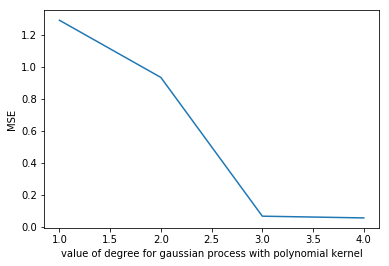

In [3]:
import numpy as np
from numpy import *
import csv
import math
import operator
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures


# function to import train data
def importData(file):
    data = []
    csvFile = open(file, "r")
    csv_reader = csv.reader(csvFile, delimiter=',')
    
    for row in csv_reader:
        tmp = []
        for col in row:
            tmp.append(float(col))
        data.append(tmp)
        
    return data

def gaussianProcess(d, xTrain, xValidation, yTrain, yValidation):
    MSE = 0
    # get I 
    I = np.zeros((len(xTrain),len(xTrain)))
    for i in range(len(I)):
        I[i][i] = 1
    # get gram matrix
    K = np.zeros((len(xTrain),len(xTrain)))
    for i in range(len(xTrain)):
        for j in range(len(xTrain)):
            K[i,j] = (dot(xTrain[i], xTrain[j]) + 1)**d
    k = np.zeros((len(xValidation), len(xTrain)))
    for i in range(len(xValidation)):
        for j in range(len(xTrain)):
            k[i,j] = (dot(xValidation[i], xTrain[j]) + 1)**d
    # compute
    K = K + I
    K = np.matrix(K)
    KI = K.getI()
    pred = dot(k, dot(KI, yTrain))
    for i in range(len(xValidation)):
        MSE += float(pred[i] - yValidation[i])**2
    return MSE / len(xValidation)

# import train input & target
X = []
Y = []
for i in range(1, 11):
    X += importData("trainInput" + str(i) + ".csv")
    Y += importData("trainTarget" + str(i) + ".csv")
X = np.array(X)
Y = np.array(Y)

# import test input & target
x = importData("testInput.csv")
y = importData("testTarget.csv")

# 10-fold validation initialize
kf = KFold(n_splits=10)

degreeRange = np.arange(1, 5)
minMSE = float('inf')
score_list = []
bestdegree = 0

for i in degreeRange:
    total = 0
    for train_index, test_index in kf.split(X):
        #print("train:", train_index, "validation:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        total += gaussianProcess(i, X_train, X_test, Y_train, Y_test)
    # compute avgMSE
    avgMSE = total / 10
    if avgMSE < minMSE:
        minMSE = avgMSE
        bestdegree = i
    print("when degree = " + str(i))
    print("MSE for Gaussian Process with polynomial is " + str(avgMSE))
    score_list.append(avgMSE)
    

print("best degree is " + str(bestdegree))

result = gaussianProcess(bestdegree, X, x, Y, y)

print("MSE using best degree " + str(bestdegree) + " for test set is " + str(result))

plt.plot(degreeRange, score_list)
plt.xlabel("value of degree for gaussian process with polynomial kernel")
plt.ylabel("MSE")
plt.show()